In [1]:
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

sys.path.append('../models_new')
import model_utils_new as util
from construct_model_matrices_random  import ModelMatrixConstructor

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#DATA_DIR = '../../data/Xy_internal_split_data'
DATA_DIR = '../../data/Xy_random_split_data'
TEST = False

In [3]:
matrix_constructor = ModelMatrixConstructor(DATA_DIR, TEST)
matrix_constructor.construct_model_matrices()

Loading data from ['X_train_1998.csv', 'X_train_1999.csv', 'X_train_2000.csv', 'X_train_2001.csv', 'X_train_2002.csv', 'X_train_2003.csv', 'X_train_2004.csv', 'X_train_2005.csv', 'X_train_2006.csv', 'X_train_2007.csv', 'X_train_2008.csv', 'X_train_2009.csv', 'X_train_2010.csv', 'X_train_2011.csv', 'X_train_2012.csv', 'X_train_2013.csv', 'X_train_2014.csv', 'X_train_2015.csv']...
Loading data from ['X_valid_1998.csv', 'X_valid_1999.csv', 'X_valid_2000.csv', 'X_valid_2001.csv', 'X_valid_2002.csv', 'X_valid_2003.csv', 'X_valid_2004.csv', 'X_valid_2005.csv', 'X_valid_2006.csv', 'X_valid_2007.csv', 'X_valid_2008.csv', 'X_valid_2009.csv', 'X_valid_2010.csv', 'X_valid_2011.csv', 'X_valid_2012.csv', 'X_valid_2013.csv', 'X_valid_2014.csv', 'X_valid_2015.csv']...
Loading data from ['X_test_1998.csv', 'X_test_1999.csv', 'X_test_2000.csv', 'X_test_2001.csv', 'X_test_2002.csv', 'X_test_2003.csv', 'X_test_2004.csv', 'X_test_2005.csv', 'X_test_2006.csv', 'X_test_2007.csv', 'X_test_2008.csv', 'X_test_

In [4]:
test_vars = matrix_constructor.get_random_variables()
test_vars = sorted(test_vars)
test_vars

fixed: ['btl_t1:btl_t2', 'lat:sum9_diff', 'etopo1:sum9_diff', 'lat_cub', 'age', 'lat', 'sum9_diff', 'btl_t1', 'lon', 'sum9_t2', 'age_sq', 'sum9_t1:sum9_t2', 'lon_cub', 'btl_t2', 'lon:sum9_diff', 'etopo1', 'lat_sq', 'age_cub', 'etopo1_sq', 'density_cub', 'density', 'lon:lat:etopo1', 'sum9_t1']
variables: ['max.drop_sq', 'TOctSep_cub', 'AugMaxT', 'PMarAug', 'cwd_sq', 'PMarAug_sq', 'max.drop', 'AugMaxT_sq', 'TOctSep', 'MarMin', 'MarMin_sq', 'cwd']


['AugMaxT',
 'AugMaxT_sq',
 'MarMin',
 'MarMin_sq',
 'PMarAug',
 'PMarAug_sq',
 'TOctSep',
 'TOctSep_cub',
 'age',
 'age_cub',
 'age_sq',
 'btl_t1',
 'btl_t1:btl_t2',
 'btl_t2',
 'cwd',
 'cwd_sq',
 'density',
 'density:AugMaxT',
 'density:MarMin',
 'density:PMarAug',
 'density:TOctSep',
 'density:cwd',
 'density:max.drop',
 'density_cub',
 'etopo1',
 'etopo1:AugMaxT',
 'etopo1:MarMin',
 'etopo1:PMarAug',
 'etopo1:TOctSep',
 'etopo1:cwd',
 'etopo1:max.drop',
 'etopo1:sum9_diff',
 'etopo1_sq',
 'lat',
 'lat:AugMaxT',
 'lat:MarMin',
 'lat:PMarAug',
 'lat:TOctSep',
 'lat:cwd',
 'lat:max.drop',
 'lat:sum9_diff',
 'lat_cub',
 'lat_sq',
 'lon',
 'lon:AugMaxT',
 'lon:MarMin',
 'lon:PMarAug',
 'lon:TOctSep',
 'lon:cwd',
 'lon:lat:etopo1',
 'lon:max.drop',
 'lon:sum9_diff',
 'lon_cub',
 'max.drop',
 'max.drop_sq',
 'sum9_diff',
 'sum9_t1',
 'sum9_t1:sum9_t2',
 'sum9_t2']

In [5]:
def print_dims(data_set, name):
    print('%s:\n X: %r\n y: %r' 
          % (name, data_set[0].shape, data_set[1].shape))

In [6]:
for var in ['x', 'y', 'year']:
    test_vars.append(var)
test_vars

['AugMaxT',
 'AugMaxT_sq',
 'MarMin',
 'MarMin_sq',
 'PMarAug',
 'PMarAug_sq',
 'TOctSep',
 'TOctSep_cub',
 'age',
 'age_cub',
 'age_sq',
 'btl_t1',
 'btl_t1:btl_t2',
 'btl_t2',
 'cwd',
 'cwd_sq',
 'density',
 'density:AugMaxT',
 'density:MarMin',
 'density:PMarAug',
 'density:TOctSep',
 'density:cwd',
 'density:max.drop',
 'density_cub',
 'etopo1',
 'etopo1:AugMaxT',
 'etopo1:MarMin',
 'etopo1:PMarAug',
 'etopo1:TOctSep',
 'etopo1:cwd',
 'etopo1:max.drop',
 'etopo1:sum9_diff',
 'etopo1_sq',
 'lat',
 'lat:AugMaxT',
 'lat:MarMin',
 'lat:PMarAug',
 'lat:TOctSep',
 'lat:cwd',
 'lat:max.drop',
 'lat:sum9_diff',
 'lat_cub',
 'lat_sq',
 'lon',
 'lon:AugMaxT',
 'lon:MarMin',
 'lon:PMarAug',
 'lon:TOctSep',
 'lon:cwd',
 'lon:lat:etopo1',
 'lon:max.drop',
 'lon:sum9_diff',
 'lon_cub',
 'max.drop',
 'max.drop_sq',
 'sum9_diff',
 'sum9_t1',
 'sum9_t1:sum9_t2',
 'sum9_t2',
 'x',
 'y',
 'year']

In [7]:
data_sets = matrix_constructor.select_variables(test_vars)
[[X_train, y_train], [X_valid, y_valid], [X_test, y_test]] = data_sets
for (data_set, name) in zip(data_sets, ['Train', 'Valid', 'Test']):
    print_dims(data_set, name)
    
X_train.head()

Train:
 X: (776354, 62)
 y: (776354, 1)
Valid:
 X: (97189, 62)
 y: (97189, 1)
Test:
 X: (97665, 62)
 y: (97665, 1)


,AugMaxT,AugMaxT_sq,MarMin,MarMin_sq,PMarAug,PMarAug_sq,TOctSep,TOctSep_cub,age,age_cub,...,lon_cub,max.drop,max.drop_sq,sum9_diff,sum9_t1,sum9_t1:sum9_t2,sum9_t2,x,y,year
0,38.752094,1501.724762,-5.356053,28.687305,248.420357,61712.673590,17.674805,5521.587080,0.0,0.0,...,-1.146947e+06,7.967943,63.488122,0,0,0,0,-450000.0,-2040000.0,2015
1,36.743772,1350.104790,-5.843041,34.141126,277.608826,77066.660543,15.810140,3951.910723,0.0,0.0,...,-1.143540e+06,6.498623,42.232095,0,0,0,0,-440000.0,-2040000.0,2015
2,37.632520,1416.206524,-5.443481,29.631485,265.809790,70654.844680,17.037255,4945.370533,0.0,0.0,...,-1.140139e+06,6.901709,47.633583,0,0,0,0,-430000.0,-2040000.0,2015
3,38.558851,1486.785028,-5.006946,25.069503,257.022780,66060.709480,17.539479,5395.727892,0.0,0.0,...,-1.136745e+06,7.780649,60.538495,0,0,0,0,-420000.0,-2040000.0,2015
4,39.136888,1531.695991,-5.000000,25.000000,249.247327,62124.229964,17.875142,5711.477542,0.0,0.0,...,-1.133357e+06,8.336508,69.497363,0,0,0,0,-410000.0,-2040000.0,2015


In [8]:
max(X_test.x), max(X_test.y)

(-140000.0, 1540000.0)

In [9]:
density_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == 2009, :], 'density')

matrix shape: (195, 357)


In [10]:
density_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == 2009, :], 'density')

matrix shape: (192, 355)


In [11]:
density_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == 2009, :], 'density')

matrix shape: (196, 350)


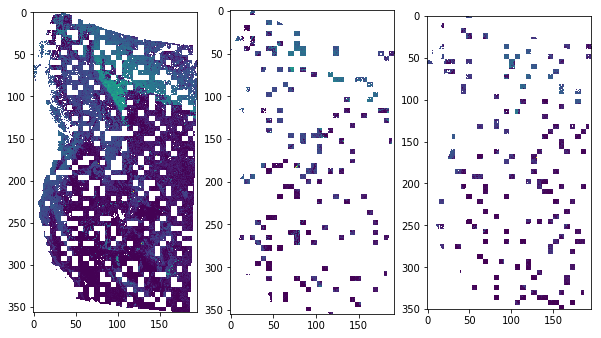

In [12]:
plt.figure(figsize=(10,8))
plt.subplot(1, 3, 1);
imshow(np.rot90(density_matrix_train));
plt.subplot(1, 3, 2);
imshow(np.rot90(density_matrix_valid));
plt.subplot(1, 3, 3);
imshow(np.rot90(density_matrix_test));

In [13]:
btl_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == 2009, :], 'btl_t1')
btl_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == 2009, :], 'btl_t1')
btl_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == 2009, :], 'btl_t1')

matrix shape: (195, 357)
matrix shape: (192, 355)
matrix shape: (196, 350)


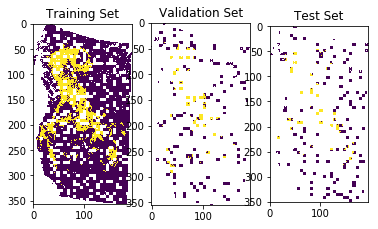

In [14]:
plt.subplot(1, 3, 1);
imshow(np.rot90(btl_matrix_train));
plt.title('Training Set');
plt.subplot(1, 3, 2);
imshow(np.rot90(btl_matrix_valid));
plt.title('Validation Set');
plt.subplot(1, 3, 3);
imshow(np.rot90(btl_matrix_test));
plt.title('Test Set');

In [15]:
util.print_percent_presence(y_train, 'y_train')
util.print_percent_presence(y_valid, 'y_valid')
util.print_percent_presence(y_test, 'y_test')

Percent presence in y_train: 12.99%
Percent presence in y_valid: 13.99%
Percent presence in y_test: 12.65%


In [16]:
print('Baseline accuracy if predicting "absent" for all cells:')
print('  train:', 100 - 13.03)
print('  valid:', 100 - 12.85)
print('  test: ', 100 - 13.38)

Baseline accuracy if predicting "absent" for all cells:
  train: 86.97
  valid: 87.15
  test:  86.62


In [17]:
y_train.columns=['btl_t']
y_valid.columns=['btl_t']
y_test.columns=['btl_t']

In [18]:
full_train = X_train.copy()
full_valid = X_valid.copy()
full_test = X_test.copy()

full_train['btl_t'] = y_train['btl_t']
full_valid['btl_t'] = y_valid['btl_t']
full_test['btl_t'] = y_test['btl_t']

In [19]:
drop = ['x', 'y', 'year']
X_train = X_train.drop(drop, axis=1)
X_valid = X_valid.drop(drop, axis=1)
X_test  = X_test.drop(drop, axis=1)

In [48]:
type(X_train)

numpy.ndarray

In [20]:
predictors = list(X_train)

In [49]:
predictors

['AugMaxT',
 'AugMaxT_sq',
 'MarMin',
 'MarMin_sq',
 'PMarAug',
 'PMarAug_sq',
 'TOctSep',
 'TOctSep_cub',
 'age',
 'age_cub',
 'age_sq',
 'btl_t1',
 'btl_t1:btl_t2',
 'btl_t2',
 'cwd',
 'cwd_sq',
 'density',
 'density:AugMaxT',
 'density:MarMin',
 'density:PMarAug',
 'density:TOctSep',
 'density:cwd',
 'density:max.drop',
 'density_cub',
 'etopo1',
 'etopo1:AugMaxT',
 'etopo1:MarMin',
 'etopo1:PMarAug',
 'etopo1:TOctSep',
 'etopo1:cwd',
 'etopo1:max.drop',
 'etopo1:sum9_diff',
 'etopo1_sq',
 'lat',
 'lat:AugMaxT',
 'lat:MarMin',
 'lat:PMarAug',
 'lat:TOctSep',
 'lat:cwd',
 'lat:max.drop',
 'lat:sum9_diff',
 'lat_cub',
 'lat_sq',
 'lon',
 'lon:AugMaxT',
 'lon:MarMin',
 'lon:PMarAug',
 'lon:TOctSep',
 'lon:cwd',
 'lon:lat:etopo1',
 'lon:max.drop',
 'lon:sum9_diff',
 'lon_cub',
 'max.drop',
 'max.drop_sq',
 'sum9_diff',
 'sum9_t1',
 'sum9_t1:sum9_t2',
 'sum9_t2']

In [21]:
def scale_data(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test  = scaler.transform(X_test)
    return X_train, X_valid, X_test

In [22]:
X_train, X_valid, X_test = scale_data(X_train, X_valid, X_test) 

In [23]:
y_train = y_train['btl_t'].values.reshape(-1)
y_valid = y_valid['btl_t'].values.reshape(-1)
y_test  = y_test['btl_t'].values.reshape(-1)

In [24]:
# Find optimal regularization via best validation-set accuracy
l1_mods = []
l2_mods = []
Cs = np.logspace(-4, 0, 5)
best_C = np.nan
best_accuracy = 0
t0 = time.time()
best_penalty = None

for C in Cs:
    print('Testing C =', C)
    for penalty in ['l1', 'l2']: #['l1', 'l2']:
        print('  %s:' % penalty, end=' ')
        logistic_clf = LogisticRegression(
            C=C, penalty=penalty, solver='saga', n_jobs=-1)
        logistic_clf.fit(X_train, y_train)
        preds = logistic_clf.predict(X_valid)
        accuracy = sum(y_valid == preds) / len(preds)
        if (accuracy > best_accuracy):
            best_C = C
            best_accuaracy = accuracy
            best_penalty = penalty
        print(round(accuracy, 4))
        if penalty == 'l1':
            l1_mods.append(accuracy)
        else:
            l2_mods.append(accuracy)
        print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))

Testing C = 0.0001
  l1: 0.932
Elapsed time: 0.19 minutes
  l2: 0.933
Elapsed time: 0.39 minutes
Testing C = 0.001
  l1: 0.9335
Elapsed time: 1.60 minutes
  l2: 0.9335
Elapsed time: 2.11 minutes
Testing C = 0.01
  l1: 

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.934
Elapsed time: 3.84 minutes
  l2: 0.9342
Elapsed time: 5.28 minutes
Testing C = 0.1
  l1: 0.9342
Elapsed time: 7.11 minutes
  l2: 0.934
Elapsed time: 8.97 minutes
Testing C = 1.0
  l1: 0.9342
Elapsed time: 10.97 minutes
  l2: 0.9341
Elapsed time: 12.46 minutes


In [25]:
!say "I'm done"

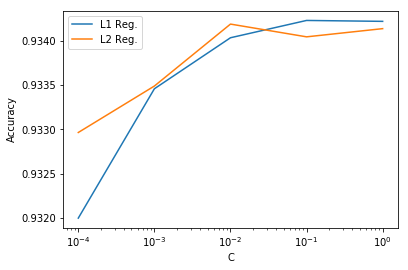

In [26]:
plt.plot(Cs, l1_mods, label='L1 Reg.');
plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [27]:
l1_mods = []
l2_mods = []
Cs = np.logspace(-1.5, 0, 4)

t0 = time.time()
for C in Cs:
    print('Testing C =', C)
    for penalty in ['l1', 'l2']:
        print('  %s:' % penalty, end=' ')
        logistic_clf = LogisticRegression(C=C, penalty=penalty, n_jobs=-1)
        logistic_clf.fit(X_train, y_train)
        preds = logistic_clf.predict(X_valid)
        accuracy = sum(y_valid == preds) / len(preds)
        print(round(accuracy, 4))
        if penalty == 'l1':
            l1_mods.append(accuracy)
        else:
            l2_mods.append(accuracy)
        print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))

Testing C = 0.03162277660168379
  l1: 

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.9351
Elapsed time: 4.15 minutes
  l2: 0.935
Elapsed time: 4.64 minutes
Testing C = 0.1
  l1: 0.935
Elapsed time: 26.11 minutes
  l2: 0.9349
Elapsed time: 26.84 minutes
Testing C = 0.31622776601683794
  l1: 0.9352
Elapsed time: 82.88 minutes
  l2: 0.9351
Elapsed time: 84.02 minutes
Testing C = 1.0
  l1: 0.9352
Elapsed time: 151.49 minutes
  l2: 0.9353
Elapsed time: 152.53 minutes


In [28]:
!say "I'm done"

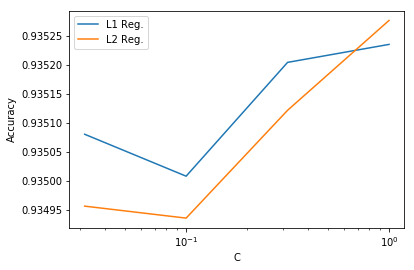

In [29]:
plt.plot(Cs, l1_mods, label='L1 Reg.');
plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [30]:
[(c, acc) for c, acc in zip(Cs, l2_mods)]

[(0.03162277660168379, 0.9349566652909617),
 (0.1, 0.934936029715229),
 (0.31622776601683794, 0.9351217498968222),
 (1.0, 0.9352765167148164)]

In [27]:
best_C = 1

In [28]:
logistic_clf = LogisticRegression(C=best_C, penalty='l2')
logistic_clf.fit(X_train, y_train)
preds = logistic_clf.predict(X_test)
probs = logistic_clf.predict_proba(X_test)
accuracy = sum(y_test == preds) / len(preds)
accuracy

0.9387600470997799

In [29]:
def get_predictions_at_threshold(pred_ps, threshold):
    return 1 * (pred_ps >= threshold)

def threshold_plot(pred_ps, targets):
    thresholds = np.linspace(0, 1, 500)
    accuracies = []
    n = len(pred_ps)

    for threshold in thresholds:
        preds = get_predictions_at_threshold(pred_ps, threshold)
        accuracies.append((preds == targets).sum() / n)
        
    plt.plot(thresholds, accuracies);
    optimal_threshold = thresholds[np.argmax(accuracies)]
    optimal_accuracy = max(accuracies)
    plt.plot([optimal_threshold, optimal_threshold], 
             [min(accuracies), max(accuracies)], 
             'r')
    plt.plot([0, 1], [optimal_accuracy, optimal_accuracy], 'r')
    plt.xlabel('Threshold for predicting "Renewal"')
    plt.ylabel('Accuracy')
    plt.show()
    return {'threshold': optimal_threshold, 'accuracy': optimal_accuracy}

[[9.99889283e-01 1.10716676e-04]
 [9.99917936e-01 8.20637058e-05]
 [9.99917462e-01 8.25375178e-05]
 [9.99937203e-01 6.27970845e-05]
 [9.99947057e-01 5.29426781e-05]]


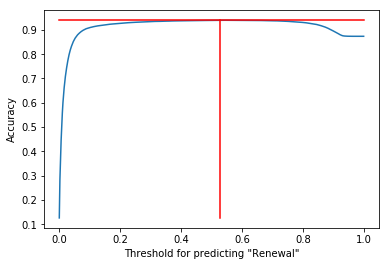

{'threshold': 0.5290581162324649, 'accuracy': 0.9395075001279886}


In [50]:
pred_ps = logistic_clf.predict_proba(X_test)
print(pred_ps[:5])
pred_ps = np.array([p[1] for p in pred_ps])
pred_ps[:5]

THRESHOLD = 0.5
preds = get_predictions_at_threshold(pred_ps, THRESHOLD)
preds[:5]

best_threshold = threshold_plot(pred_ps, y_test);
print(best_threshold)

In [51]:
cm = util.make_confusion_matrix(y_test, pred_ps, 0.5)
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	9281		3075
        0	2906		82403
Accuracy:  0.9387600470997799
Precision: 0.7615491917617133
Recall:    0.751133052767886
F1:        0.7563052601556453


In [52]:
cm = util.make_confusion_matrix(
    y_test, pred_ps, best_threshold['threshold'])
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	9162		3194
        0	2714		82595
Accuracy:  0.9395075001279886
Precision: 0.771471876052543
Recall:    0.7415021042408546
F1:        0.7561901617695608


In [53]:
auc_metrics = util.get_auc(y_test, pred_ps)

AUC:       0.9667993707607998


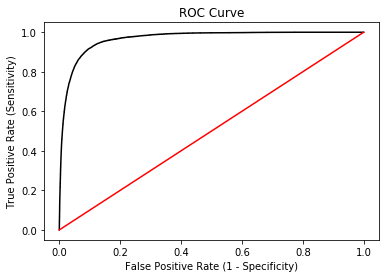

In [54]:
util.plot_roc(auc_metrics['fpr'], auc_metrics['tpr'])

In [55]:
coefs = pd.DataFrame(
    [[pred, coef] 
     for pred, coef in zip(predictors, logistic_clf.coef_[0])], 
    columns=['predictor', 'coef'])
coefs['abs'] = np.abs(coefs.coef)
coefs = coefs.sort_values('abs', ascending=False)
coefs = coefs.drop(['abs'], axis=1)
coefs

,predictor,coef
33,lat,10.672970
48,lon:cwd,-7.996197
38,lat:cwd,-6.936348
41,lat_cub,-6.900734
24,etopo1,6.848150
49,lon:lat:etopo1,3.588129
6,TOctSep,3.400101
4,PMarAug,3.159198
46,lon:PMarAug,3.158369
15,cwd_sq,-2.725162


In [36]:
print(full_train.shape)
#type(pred_ps_train)

(776354, 63)


In [37]:
logistic_clf.predict_proba(X_train)

array([[9.99746516e-01, 2.53484237e-04],
       [9.99204126e-01, 7.95873994e-04],
       [9.99573914e-01, 4.26085578e-04],
       ...,
       [9.59984762e-01, 4.00152375e-02],
       [9.67496465e-01, 3.25035355e-02],
       [9.67865652e-01, 3.21343485e-02]])

In [38]:
pred_ps_train = logistic_clf.predict_proba(X_train)
pred_ps_train = np.array([p[1] for p in pred_ps_train])

pred_ps_valid = logistic_clf.predict_proba(X_valid)
pred_ps_valid = np.array([p[1] for p in pred_ps_valid])

full_train['probs'] = pred_ps_train
full_train['preds'] = get_predictions_at_threshold(
    pred_ps_train, best_threshold['threshold'])


full_valid['probs'] = pred_ps_valid
full_valid['preds'] = get_predictions_at_threshold(
    pred_ps_valid, best_threshold['threshold'])

In [39]:
full_test['probs'] = pred_ps
full_test['preds'] = get_predictions_at_threshold(
    pred_ps, best_threshold['threshold'])
full_test.head()

,AugMaxT,AugMaxT_sq,MarMin,MarMin_sq,PMarAug,PMarAug_sq,TOctSep,TOctSep_cub,age,age_cub,...,sum9_diff,sum9_t1,sum9_t1:sum9_t2,sum9_t2,x,y,year,btl_t,probs,preds
0,40.320885,1625.773780,-4.906324,24.072017,235.923883,55660.078692,18.484770,6316.000948,0.0,0.0,...,0,0,0,0,-390000.0,-2040000.0,2015,0,0.000111,0
1,40.502707,1640.469283,-4.817822,23.211408,231.359150,53527.056295,18.681193,6519.492868,0.0,0.0,...,0,0,0,0,-380000.0,-2040000.0,2015,0,0.000082,0
2,40.605501,1648.806708,-4.754256,22.602955,226.817014,51445.957945,18.677487,6515.613919,0.0,0.0,...,0,0,0,0,-370000.0,-2040000.0,2015,0,0.000083,0
3,40.957636,1677.527930,-4.492903,20.186177,225.294244,50757.496542,18.948547,6803.427307,0.0,0.0,...,0,0,0,0,-360000.0,-2040000.0,2015,0,0.000063,0
4,41.064250,1686.272668,-4.192837,17.579879,218.747075,47850.282948,19.151483,7024.367666,0.0,0.0,...,0,0,0,0,-350000.0,-2040000.0,2015,0,0.000053,0


In [40]:
def pred_plot(actual_matrix, pred_matrix, error_matrix, year):
    plt.subplot(131)
    imshow(np.rot90(actual_matrix));
    plt.title('%d Actual' % year);
    plt.subplot(132)
    imshow(np.rot90(pred_matrix));
    plt.title('%d Predicted' % year);
    plt.subplot(133)
    imshow(np.rot90(error_matrix));
    plt.title('%d Error' % year);

In [41]:
def make_actual_pred_and_error_matrices(
    data, year, pred_type='preds', plot=False):
    data_year = data.loc[data.year == year, :]
    actual_matrix = util.column2matrix(data_year, 'btl_t')
    pred_matrix   = util.column2matrix(data_year, pred_type)
    error_matrix  = pred_matrix - actual_matrix
    if plot:
        pred_plot(actual_matrix, pred_matrix, error_matrix, year)        
    return actual_matrix, pred_matrix, error_matrix

matrix shape: (196, 359)
matrix shape: (196, 359)
matrix shape: (195, 357)
matrix shape: (195, 357)


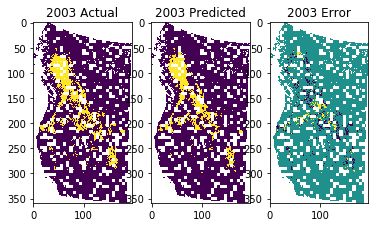

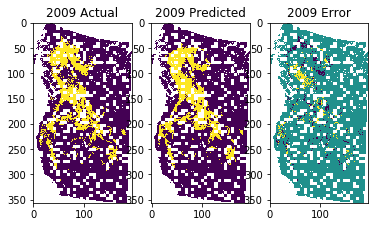

In [42]:
years = [2003, 2009]
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_train, year, plot=True)

matrix shape: (196, 351)
matrix shape: (196, 351)
matrix shape: (192, 355)
matrix shape: (192, 355)


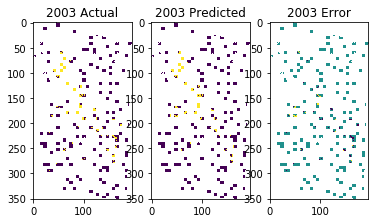

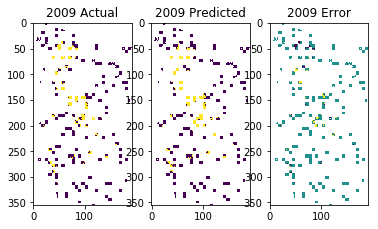

In [43]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_valid, year, plot=True)

matrix shape: (184, 346)
matrix shape: (184, 346)
matrix shape: (196, 350)
matrix shape: (196, 350)


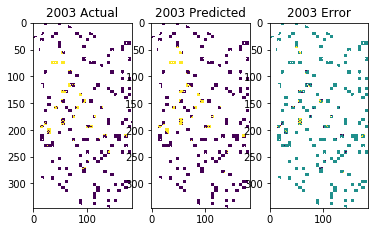

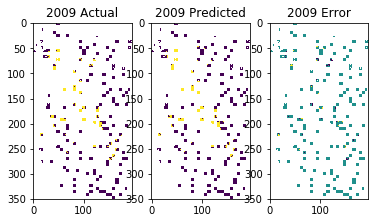

In [44]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_test, year, plot=True)

In [45]:
all_data = full_train.append(full_valid).append(full_test)
all_data.index = range(all_data.shape[0])

matrix shape: (196, 359)
matrix shape: (196, 359)
matrix shape: (196, 359)
matrix shape: (196, 359)


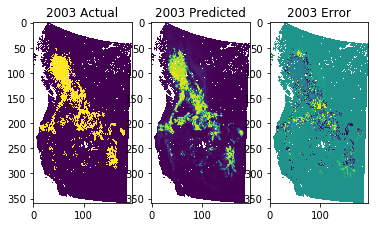

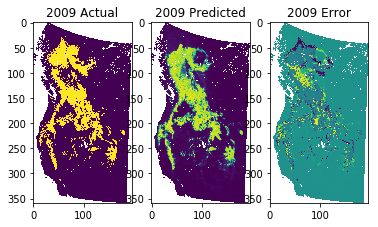

In [46]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(
        all_data, year, pred_type='probs', plot=True)

In [47]:
!say "I'm done"